In [1]:
# Import all the package you need to use like before:

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 
import scipy.optimize as opt

In [3]:
# Load the data like before:


In [4]:
data=np.genfromtxt('P2data2.txt',delimiter=',')

In [5]:
#Plot the data

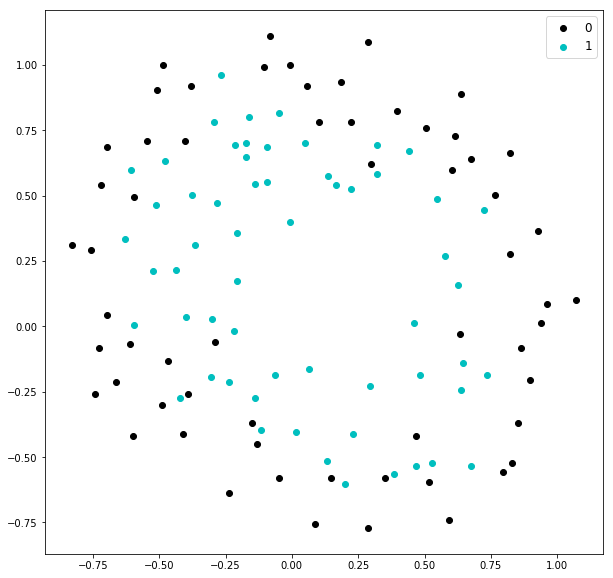

In [6]:
plt.figure(figsize=(10,10))
#plt.plot(X,Y)
plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1],color='k')
plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1],color='c')
plt.legend(['0','1'], fontsize='12')
plt.show()

In [7]:
# Define the sigmoid function like before:

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [9]:
# Define the regulated compute cost function:

In [10]:
def costReg(theta, X, y, learningRate):
    m = len(y)  
    n=len(theta)    
    J=((y*np.log(sigmoid(X@theta))+ (1-y)*np.log(1 - sigmoid(X@theta))).sum())/(-m)
    R=(learningRate/(2.*m))*((np.square(theta[1:n])).sum())
    regulated_cost=J+R
    return regulated_cost


In [11]:
# Define the regulated compute gradient function:

In [12]:
def gradientReg(theta, X, y, learningRate):  
    m = len(y)
    n=len(theta)
    grad= ((1/m)*X.T@(sigmoid(X@theta) - y))
    grad[1:n] += theta[1:n]*(learningRate/m)
    
    return grad


# create initial feature vector, all zeros








In [13]:
# Map the 2D features into 28D features (6 degree)

In [14]:
X1=np.column_stack((data[:,0], data[:,1]))
Y=data[:,2]
Y=Y.reshape(-1,1)
map_=PolynomialFeatures(degree=6)
X=map_.fit_transform(X1)


In [15]:
# Compute cost and gradient:

In [37]:
theta = np.zeros((28))
theta=theta.reshape(-1,1)
print ("On first iteration, value of cost function =", costReg(theta, X, Y, 1))
print ("On first iteration, value of gradient function =", gradientReg(theta, X, Y, 1))

On first iteration, value of cost function = 0.6931471805599454
On first iteration, value of gradient function = [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]
 [3.76648474e-02]
 [1.83559872e-02]
 [7.32393391e-03]
 [8.19244468e-03]
 [2.34764889e-02]
 [3.93486234e-02]
 [2.23923907e-03]
 [1.28600503e-02]
 [3.09593720e-03]
 [3.93028171e-02]
 [1.99707467e-02]
 [4.32983232e-03]
 [3.38643902e-03]
 [5.83822078e-03]
 [4.47629067e-03]
 [3.10079849e-02]
 [3.10312442e-02]
 [1.09740238e-03]
 [6.31570797e-03]
 [4.08503006e-04]
 [7.26504316e-03]
 [1.37646175e-03]
 [3.87936363e-02]]


In [38]:
# Optimize the cost to find the minimum cost (fmin_tnc):

In [18]:
 
weights = opt.fmin_tnc(func=costReg, x0=theta.flatten(), fprime=gradientReg, args=(X, Y.flatten(),1))
w=weights[0]
print('The optimal weights for learning rate=1 are:',w)
#print('The optimal cost is:',costReg(w, X, Y, 1))

The optimal weights for ldearning rate=1 are: [ 1.27271026  0.62529965  1.18111686 -2.01987398 -0.91743191 -1.43166928
  0.12393228 -0.36553117 -0.35725401 -0.17516291 -1.4581701  -0.05098417
 -0.61558548 -0.27469165 -1.19271296 -0.24217841 -0.20603291 -0.0446618
 -0.27778956 -0.29539513 -0.45645982 -1.04319156  0.02779373 -0.29244877
  0.01555762 -0.32742408 -0.14389151 -0.92467487]


In [19]:
# Define a predict function to calculate the result like before:

In [20]:
def predict(w, X):
    w=w.reshape(-1,1)
    h=sigmoid(np.dot(X,w))
    h1=h.round()
    return h1

In [21]:
# Find the accuracy of the regulated logistic regression like before:

In [22]:
accuracy=predict(w,X)
p=(accuracy == Y).mean()
print('The accuracy from  calculation of logistic regression is:',p*100,"%")

The accuracy from  calculation of logistic regression is: 83.05084745762711 %


In [23]:
# Plot the data and boundary (Need to map the features here):

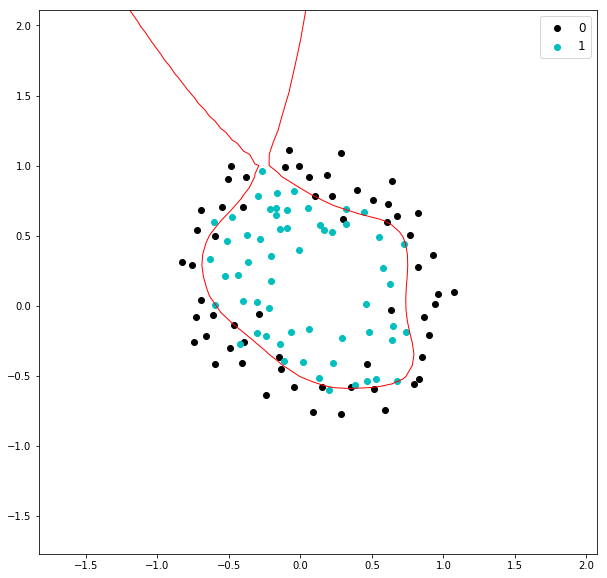

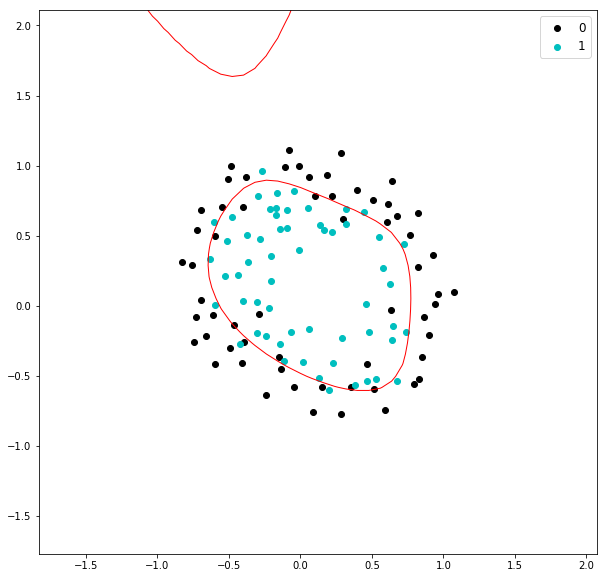

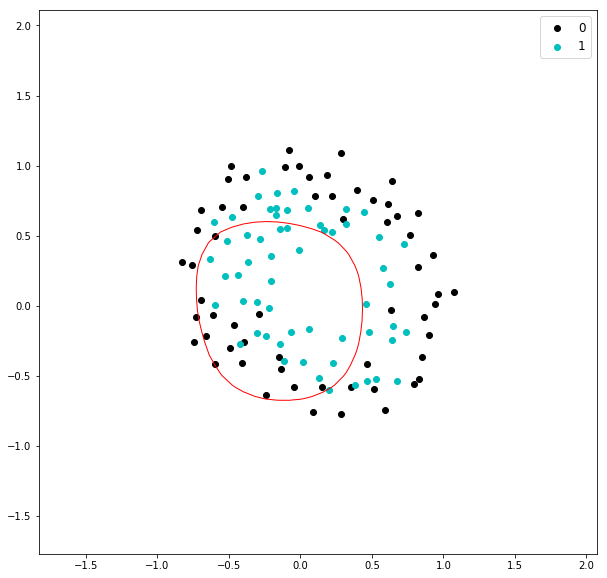

In [36]:
X1_min=data[:,0].min()-1
X1_max=data[:,0].max()+1
X2_min=data[:,1].min()-1
X2_max=data[:,1].max()+1
a,b=np.meshgrid(np.linspace(X1_min,X1_max),np.linspace(X2_min,X2_max))
Xo=np.column_stack((a.ravel(),b.ravel()))
map_=PolynomialFeatures(degree=6)
Xf=map_.fit_transform(Xo)
learningRate=[0.0001,0.01, 100]
for i in range(len(learningRate)):
    weights = opt.fmin_tnc(func=costReg, x0=theta.flatten(), fprime=gradientReg, args=(X, Y.flatten(),learningRate[i]))
    w=weights[0].reshape(-1,1)
    s=(Xf@w)
    s=s.reshape(a.shape)
   
    plt.figure(i, figsize=(10,10))
    plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1],color='k')
    plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1],color='c')
    
    plt.contour(a,b,s,[0], linewidths=1, colors='r')
    plt.legend(['0','1'], fontsize='12')
    #print('')
    #plt.title()
    plt.show()
    #the figure